In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1.0 ETL (Extract Transform Load)
The data will be cleaned and prepared for statistical analysis, visualisation

## 1.1 Load the data
By loading the data into a dataframe we can manipulate the data to gain insights and make business decisions.

In [3]:
# Import data
df = pd.read_csv('../data/raw_data/us_accidents.csv')

## 1.2 Inspect the data
After loading the dataset, the first step is to understand its structure and dimensions. This initial inspection helps identify the features available and ensures the data has loaded correctly.
The original dataset contained over 7 million rows so we decided to take a 5000 sample. By listing column names we can gain an understanding of what the dataset can tell us, and what hypotheses we can use for the project.

In [4]:
# Preview first 5 rows of dataset
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1895,Source2,2,2016-07-01 13:17:37,2016-07-01 14:17:37,37.530804,-122.297714,NaN,NaN,0.000,...,False,False,True,False,False,False,Day,Day,Day,Day
1,A-2073258,Source2,2,2019-06-26 08:17:21,2019-06-26 09:17:08,27.960699,-82.705109,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
2,A-4143196,Source1,2,2022-02-19 13:59:30.000000000,2022-02-19 16:03:00.000000000,37.701230,-121.834055,37.702002,-121.916067,4.484,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-7550274,Source1,2,2018-08-20 07:36:17,2018-08-20 08:05:38,42.385570,-83.261400,42.385390,-83.254910,0.331,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-7448730,Source1,2,2019-02-17 09:48:00,2019-02-17 10:47:00,38.347090,-112.659636,38.300895,-112.652231,3.217,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
# Check number of rows and columns
df.shape

(5000, 46)

In [6]:
# Check column names
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   object 
 1   Source                 5000 non-null   object 
 2   Severity               5000 non-null   int64  
 3   Start_Time             5000 non-null   object 
 4   End_Time               5000 non-null   object 
 5   Start_Lat              5000 non-null   float64
 6   Start_Lng              5000 non-null   float64
 7   End_Lat                2864 non-null   float64
 8   End_Lng                2864 non-null   float64
 9   Distance(mi)           5000 non-null   float64
 10  Description            5000 non-null   object 
 11  Street                 4996 non-null   object 
 12  City                   5000 non-null   object 
 13  County                 5000 non-null   object 
 14  State                  5000 non-null   object 
 15  Zipc

In [8]:
# Check quantity of dtypes - .info preview truncated because of number of columns
df.dtypes.value_counts()

object     20
bool       13
float64    12
int64       1
Name: count, dtype: int64

In [11]:
# Get statistical analysis of numerical data
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,5000.000000,5000.000000,5000.000000,2864.000000,2864.000000,5000.000000,4908.000000,3728.000000,4893.000000,4916.000000,4893.000000,4633.000000,3606.000000
mean,2.208800,36.048123,-94.518437,36.149776,-95.403536,0.583562,61.677139,58.066309,65.049867,29.539774,9.114872,7.758148,0.012085
std,0.481299,5.053728,17.313412,5.293869,18.017070,1.669626,19.369195,22.971182,22.698096,1.020222,2.694819,5.606876,0.239292
min,1.000000,25.441600,-124.414024,25.441592,-124.414952,0.000000,-35.000000,-36.000000,4.000000,20.590000,0.000000,0.000000,0.000000
25%,2.000000,32.979861,-117.153729,33.067043,-117.686101,0.000000,48.900000,42.500000,49.000000,29.380000,10.000000,4.600000,0.000000
50%,2.000000,35.691129,-87.625450,36.128110,-87.864876,0.039000,64.000000,62.000000,68.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.025062,-80.390581,40.174858,-80.296012,0.471500,77.000000,76.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.687820,-70.335648,48.532200,-70.565046,33.930000,118.400000,111.000000,100.000000,30.710000,80.000000,131.000000,9.990000


To gain a deeper understanding of the numerical data, we use the .describe() method. This provides a summary of the central tendency, dispersion, and shape of the dataset’s distribution. Although we will look for outliers with boxplots we can use this table to get an early indication by looking at the 75% (Upper quartile) value and the max, or the min value and 25% (Lower quartile).

## 1.3 Deal with problem values
In this stage, we refine the dataset by addressing inconsistencies that could skew our analysis or cause errors in machine learning models. Clean data leads to more reliable results. We will:
- Address missing values
- Drop duplicates
- Inspect for outliers

In [ ]:
# Check for null values
df.isna().sum()

ID                          0
Source                      0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                  2136
End_Lng                  2136
Distance(mi)                0
Description                 0
Street                      4
City                        0
County                      0
State                       0
Zipcode                     2
Country                     0
Timezone                    5
Airport_Code               14
Weather_Timestamp          72
Temperature(F)             92
Wind_Chill(F)            1272
Humidity(%)               107
Pressure(in)               84
Visibility(mi)            107
Wind_Direction            109
Wind_Speed(mph)           367
Precipitation(in)        1394
Weather_Condition         110
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction  

Before applying any imputation or deletion, we will filter our dataset to focus only on the relevant features. This prevents wasting computational resources on fixing columns that do not contribute to our analysis.

## 1.4 Plot the data
To understand the behaviour of our numerical variables, we will plot them on a double histogram and box plot. By doing this we will get a complete picture of the data's distribution and potential outliers we may need to remove to keep in integrity of the data.

In [ ]:
# Create variable of numerical values 
numeric = ['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

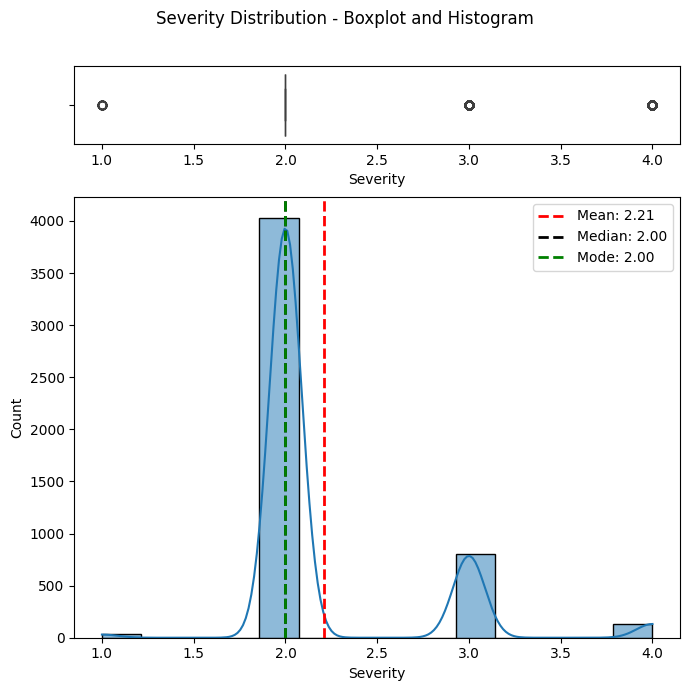

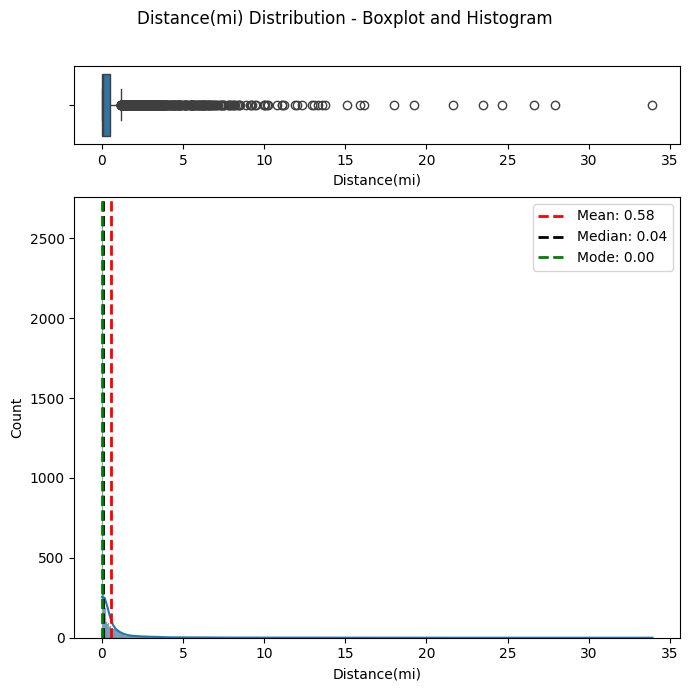

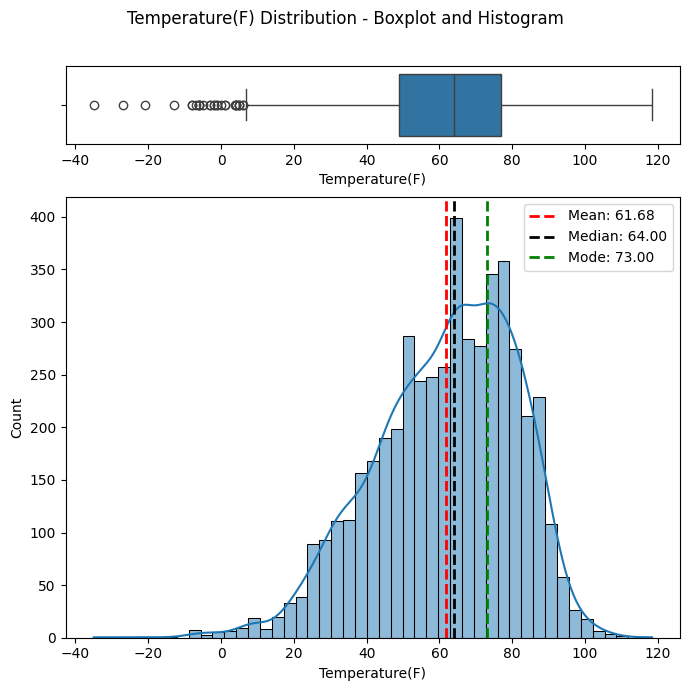

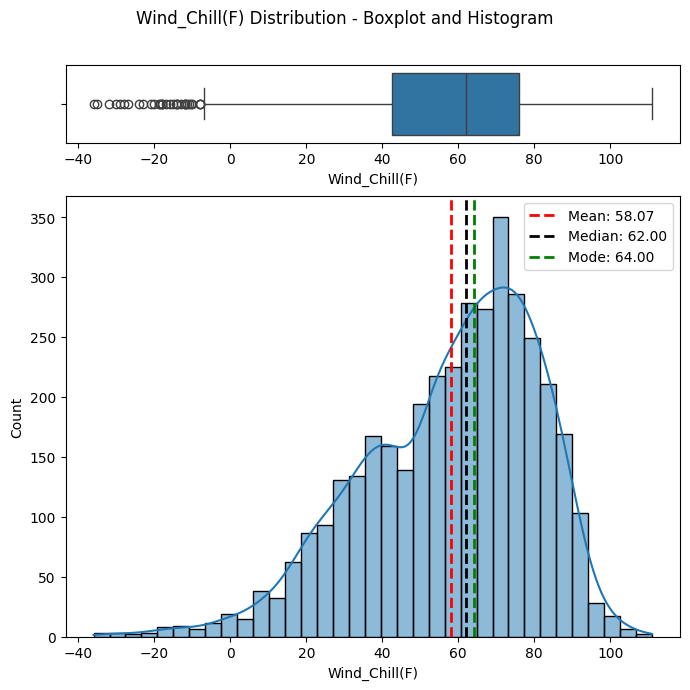

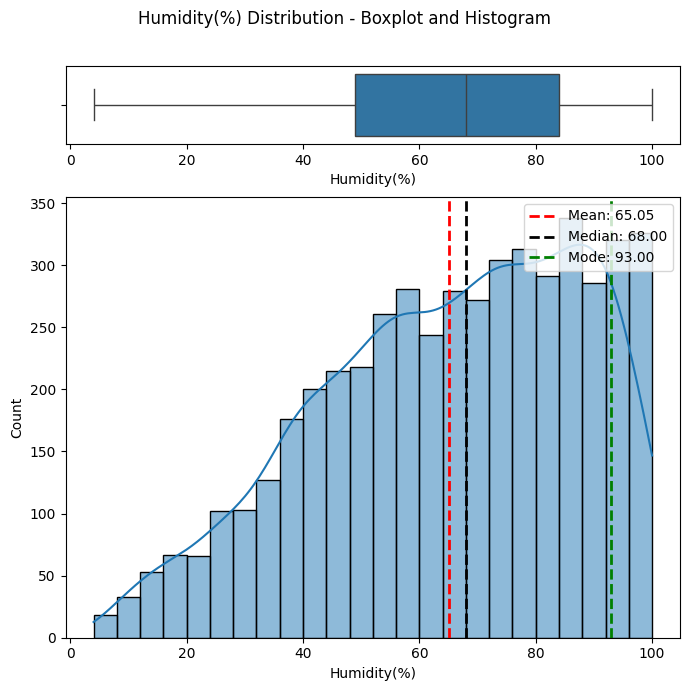

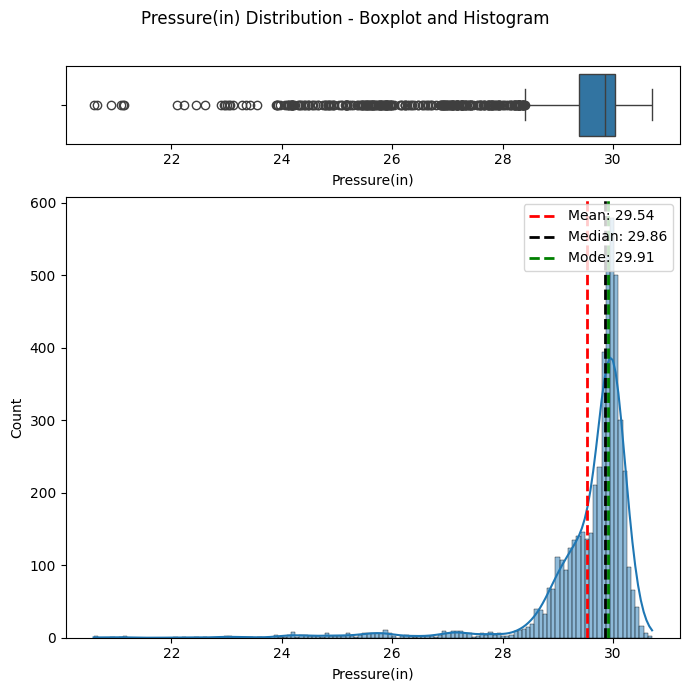

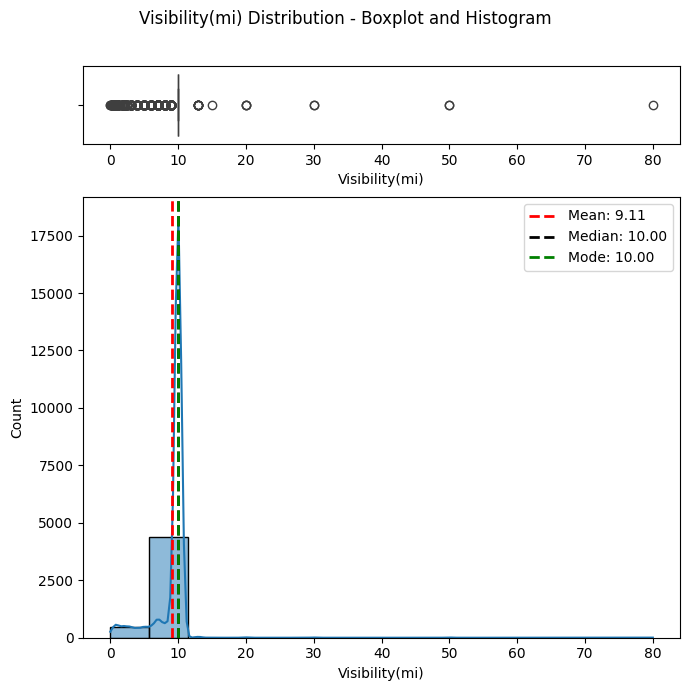

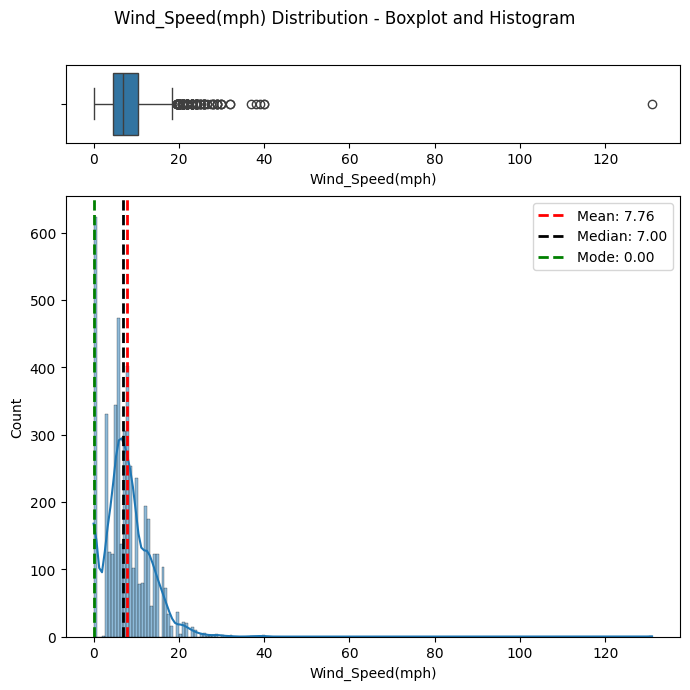

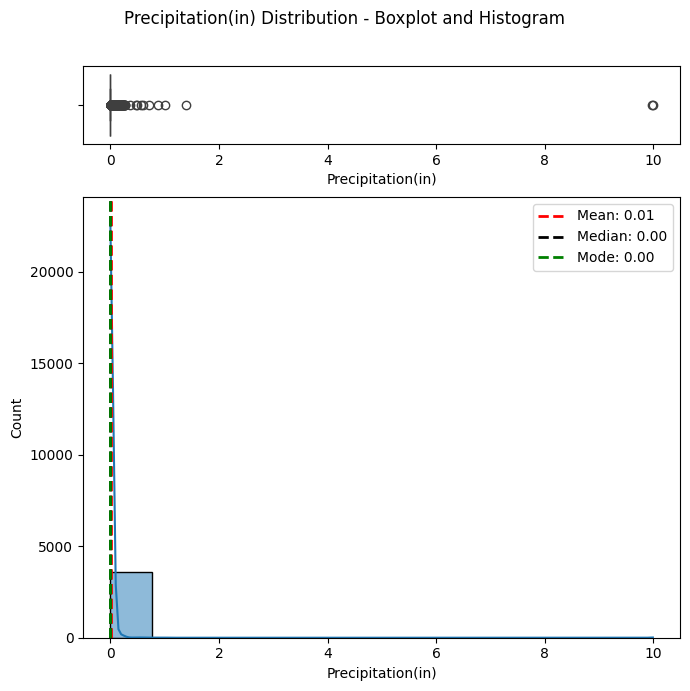

In [ ]:
# Look for outliers in numeric columns
for col in numeric:
    fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[0])
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]

    plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {mean:.2f}")
    plt.axvline(median, color='k', linestyle='dashed', linewidth=2, label=f"Median: {median:.2f}")
    plt.axvline(mode, color='g', linestyle='dashed', linewidth=2, label=f"Mode: {mode:.2f}")

    plt.legend(loc="upper right", fontsize=10)
    
    plt.tight_layout()

    fig.suptitle(f"{col} Distribution - Boxplot and Histogram")

    plt.subplots_adjust(top=0.9)

    plt.show()

print("\n")

## 1.5 Column management
Based on our exploratory analysis, we have selected a subset of features to move forward with. This selection is based on data quality, relevance to our target variable, and the elimination of redundant or highly corrupted columns:

In [ ]:
# Keep columns
df = df[['Severity', 'Start_Time', 'Start_Lat',
       'Start_Lng', 'Description', 'City', 'County', 'State', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Crossing', 'Junction', 'Traffic_Signal','Sunrise_Sunset']]

To ensure consistency and ease of use throughout the analysis, we will change all column headers. By making all characters lower case and making sure all spaces are changed to '_' we eliminate the risk of dealing with unusual character casings.

In [ ]:
# Make all columns lowercase
df.columns = df.columns.str.casefold()

In [ ]:
# Check names of columns
df.columns

Index(['severity', 'start_time', 'start_lat', 'start_lng', 'description',
       'city', 'county', 'state', 'temperature(f)', 'humidity(%)',
       'visibility(mi)', 'wind_direction', 'wind_speed(mph)',
       'precipitation(in)', 'weather_condition', 'crossing', 'junction',
       'traffic_signal', 'sunrise_sunset'],
      dtype='object')

## 1.3 Dealing with problem values - continued...
Now that we have narrowed our focus to the relevant features and standardised our column headers, we will address any remaining problem values. This ensures that our final dataset is high-quality and ready for statistical analysis or modelling.

In [ ]:
# Check for null values
df.isna().sum()

severity                0
start_time              0
start_lat               0
start_lng               0
description             0
city                    0
county                  0
state                   0
temperature(f)         92
humidity(%)           107
visibility(mi)        107
wind_direction        109
wind_speed(mph)       367
precipitation(in)    1394
weather_condition     110
crossing                0
junction                0
traffic_signal          0
sunrise_sunset         18
dtype: int64

In [ ]:
# Check values for precipitation column
df['precipitation(in)'].value_counts()

precipitation(in)
0.00    3281
0.01      99
0.02      38
0.04      28
0.03      25
0.06      19
0.05      18
0.07      15
0.08      11
0.09       9
0.13       7
0.15       6
0.11       5
0.10       5
0.25       3
0.12       3
0.16       3
0.18       3
0.23       2
0.20       2
0.21       2
0.19       2
0.22       2
0.27       2
0.26       1
0.17       1
0.36       1
9.98       1
0.49       1
0.61       1
0.24       1
9.99       1
0.88       1
0.71       1
1.01       1
0.47       1
0.14       1
0.57       1
0.28       1
1.39       1
Name: count, dtype: int64

In [ ]:
# Fill nulls with median
df['precipitation(in)'].fillna(df['precipitation(in)'].median(), inplace=True)

In [ ]:
# Create variable to fill means.
nulls_to_fill = ['temperature(f)', 'humidity(%)', 'visibility(mi)', 'wind_speed(mph)']

df[nulls_to_fill] = df[nulls_to_fill].apply(lambda x: x.fillna(x.mean()) if x.isnull().any() else x.replace(x, x.mean()))

In [ ]:
df.isna().sum()

severity               0
start_time             0
start_lat              0
start_lng              0
description            0
city                   0
county                 0
state                  0
temperature(f)         0
humidity(%)            0
visibility(mi)         0
wind_direction       109
wind_speed(mph)        0
precipitation(in)      0
weather_condition    110
crossing               0
junction               0
traffic_signal         0
sunrise_sunset        18
dtype: int64

In [ ]:
# Drop remaining null values
df = df.dropna()

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# Check shape after dealing with problem values
df.shape

(4844, 19)

In [ ]:
numeric2 = ['severity', 'temperature(f)', 'humidity(%)', 'wind_speed(mph)', 'precipitation(in)']

In [ ]:
for col in numeric2:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    bottom_bound = Q1 - (1.5 * IQR)
    top_bound = Q3 + (1.5 * IQR)
    
    print(f"--- {col} ---")
    print(f"Top outliers are > {top_bound}")
    print(f"Bottom outliers are < {bottom_bound}")
    print(f"IQR: {IQR}\n")

--- severity ---
Top outliers are > 2.0
Bottom outliers are < 2.0
IQR: 0.0

--- temperature(f) ---
Top outliers are > 116.65
Bottom outliers are < 8.249999999999993
IQR: 27.1

--- humidity(%) ---
Top outliers are > 136.5
Bottom outliers are < -3.5
IQR: 35.0

--- wind_speed(mph) ---
Top outliers are > 17.5
Bottom outliers are < -2.5
IQR: 5.0

--- precipitation(in) ---
Top outliers are > 0.0
Bottom outliers are < 0.0
IQR: 0.0



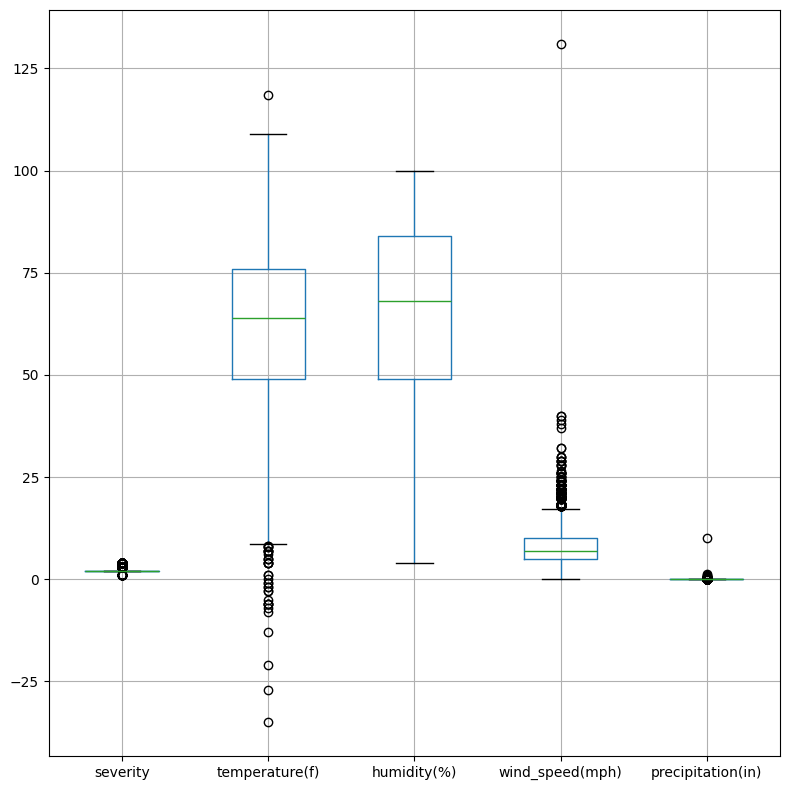

In [ ]:
df[numeric2].boxplot(figsize=(8,8))
plt.tight_layout()

In [ ]:
temp_outlier = df.loc[df['temperature(f)'] < -10]
wind_outlier = df.loc[df['wind_speed(mph)'] > 50]

In [ ]:
df = df.drop(temp_outlier.index.union(wind_outlier.index))

In [ ]:
df.head()

,severity,start_time,start_lat,start_lng,description,city,county,state,temperature(f),humidity(%),visibility(mi),wind_direction,wind_speed(mph),precipitation(in),weather_condition,crossing,junction,traffic_signal,sunrise_sunset
0,2,2016-07-01 13:17:37,37.530804,-122.297714,Accident on 39th Ave at Edison St.,San Mateo,San Mateo,CA,69.8,56.0,9.0,West,10.4,0.0,Clear,False,False,False,Day
1,2,2019-06-26 08:17:21,27.960699,-82.705109,Accident on Bayshore Blvd at FL-60 Gulf To Bay...,Clearwater,Pinellas,FL,84.0,82.0,9.0,N,7.0,0.0,Fair,True,False,True,Day
2,2,2022-02-19 13:59:30.000000000,37.701230,-121.834055,Stationary traffic on I-580 W from Airway Blvd...,Livermore,Alameda,CA,68.0,39.0,10.0,E,10.0,0.0,Fair,False,False,False,Day
3,2,2018-08-20 07:36:17,42.385570,-83.261400,At I-96 Local/Outer Dr/Exit 180 - Accident.,Detroit,Wayne,MI,67.5,85.0,10.0,NE,4.6,0.0,Clear,False,True,False,Day
4,2,2019-02-17 09:48:00,38.347090,-112.659636,At I-15-BL/1400 St/Exit 112 - Accident.,Beaver,Beaver,UT,26.6,80.0,10.0,South,12.7,0.0,Mostly Cloudy,False,False,False,Day


In [ ]:
# This is usually the most robust fix
df['start_time'] = pd.to_datetime(df['start_time'], format='mixed')

In [ ]:
df['start_time'] = pd.to_datetime(df['start_time'])

# 2. Extract components into new columns
df['year'] = df['start_time'].dt.year
df['month'] = df['start_time'].dt.month
df['day'] = df['start_time'].dt.day

# 3. Extract the time (HH:MM:SS)
df['time'] = df['start_time'].dt.time

# 4. Drop the original column
df.drop(columns=['start_time'], inplace=True)

In [ ]:
df.head(1)

,severity,start_lat,start_lng,description,city,county,state,temperature(f),humidity(%),visibility(mi),...,precipitation(in),weather_condition,crossing,junction,traffic_signal,sunrise_sunset,year,month,day,time
0,2,37.530804,-122.297714,Accident on 39th Ave at Edison St.,San Mateo,San Mateo,CA,69.8,56.0,9.0,...,0.0,Clear,False,False,False,Day,2016,7,1,13:17:37


In [ ]:
# Create a mapping dictionary
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace the values in the 'month' column
df['month'] = df['month'].replace(month_map)

In [ ]:
# Check new columns
df.head()

,severity,start_lat,start_lng,description,city,county,state,temperature(f),humidity(%),visibility(mi),...,precipitation(in),weather_condition,crossing,junction,traffic_signal,sunrise_sunset,year,month,day,time
0,2,37.530804,-122.297714,Accident on 39th Ave at Edison St.,San Mateo,San Mateo,CA,69.8,56.0,9.0,...,0.0,Clear,False,False,False,Day,2016,July,1,13:17:37
1,2,27.960699,-82.705109,Accident on Bayshore Blvd at FL-60 Gulf To Bay...,Clearwater,Pinellas,FL,84.0,82.0,9.0,...,0.0,Fair,True,False,True,Day,2019,June,26,08:17:21
2,2,37.701230,-121.834055,Stationary traffic on I-580 W from Airway Blvd...,Livermore,Alameda,CA,68.0,39.0,10.0,...,0.0,Fair,False,False,False,Day,2022,February,19,13:59:30
3,2,42.385570,-83.261400,At I-96 Local/Outer Dr/Exit 180 - Accident.,Detroit,Wayne,MI,67.5,85.0,10.0,...,0.0,Clear,False,True,False,Day,2018,August,20,07:36:17
4,2,38.347090,-112.659636,At I-15-BL/1400 St/Exit 112 - Accident.,Beaver,Beaver,UT,26.6,80.0,10.0,...,0.0,Mostly Cloudy,False,False,False,Day,2019,February,17,09:48:00


In [ ]:
df.shape

(4839, 22)

In [ ]:
df.to_csv('../data/cleaned_data/us_accidents_cleaned.csv', index=False)